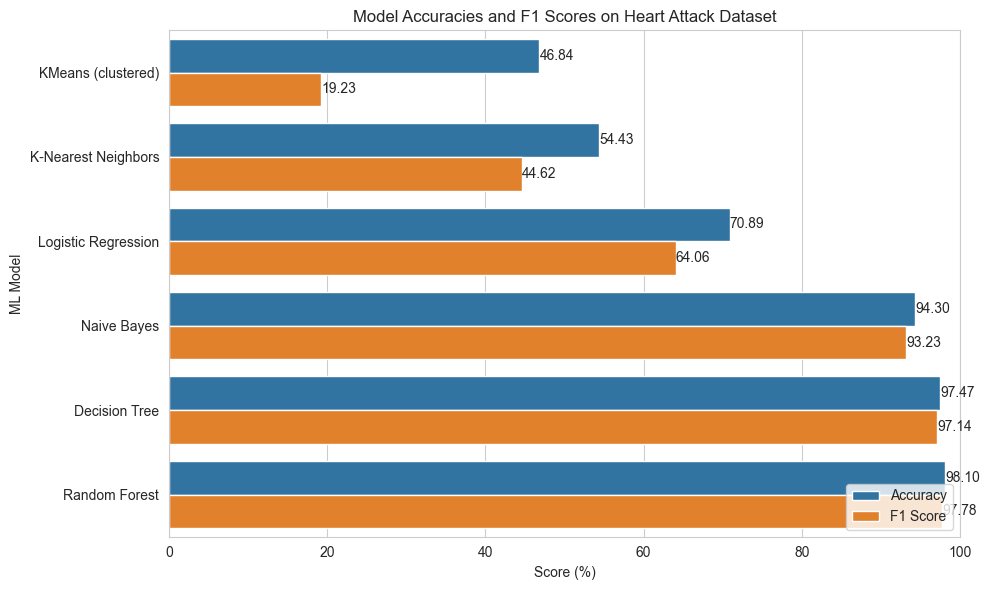

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your actual dataset here
df = pd.read_csv('../data/cleaned_Medicaldataset.csv')
X = df.drop('Result', axis=1)
y = LabelEncoder().fit_transform(df['Result'])  # 'negative' -> 0, 'positive' -> 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'KMeans (clustered)': KMeans(n_clusters=2, random_state=42)
}

# Train and collect metrics
scores = {'Model': [], 'Accuracy': [], 'F1 Score': []}

for name, model in models.items():
    if name == 'KMeans (clustered)':
        model.fit(X_train)
        y_pred = model.predict(X_test)
        # Assign dominant label to cluster
        y_pred = (y_pred == y_pred[0]).astype(int)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    scores['Model'].append(name)
    scores['Accuracy'].append(acc * 100)  # convert to percentage
    scores['F1 Score'].append(f1 * 100)

# Create DataFrame
score_df = pd.DataFrame(scores).sort_values(by='Accuracy', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
score_plot = sns.barplot(
    data=score_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
    y='Model', x='Score', hue='Metric'
)

# Add labels to bars
for container in score_plot.containers:
    score_plot.bar_label(container, fmt="%.2f", label_type="edge")

plt.title("Model Accuracies and F1 Scores on Heart Attack Dataset")
plt.xlabel("Score (%)")
plt.ylabel("ML Model")
plt.xlim(0, 100)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()